# Sentiment analysis on Twitter data
## 1. Data Collection

In [1]:
# Import secret keys into the notebook
from secrets import API_KEY, SECRET_KEY, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

In [2]:
!pip install tweepy
!pip install --upgrade tweepy
import tweepy

# your Twitter API credentials
consumer_key = API_KEY
consumer_secret = SECRET_KEY
access_token = ACCESS_TOKEN
access_token_secret = ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# public_tweets = api.search(q='your_search_term', count=100, lang='en', tweet_mode='extended')
public_tweets = api.search_tweets(q='your_search_term', count=100, lang='en', tweet_mode='extended')

## 2. Data Cleaning
- Next, clean the tweets. 
- This could involve removing URLs, mentions, special characters, and stop words.
- You could also convert all text to lower case to ensure uniformity.

In [3]:
import re
import nltk
#
# nltk.download('stopwords')
#
from nltk.corpus import stopwords

In [4]:
def clean_tweet(tweet):
    tweet = tweet.lower()  # convert text to lower-case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet)  # remove URLs
    tweet = re.sub('@[^\s]+', '', tweet)  # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)  # remove the # in #hashtag
    tweet = re.sub(r'\W', ' ', tweet)  # Remove all non-word characters
    tweet = ' '.join(word for word in tweet.split() if word not in stopwords.words('english'))  # remove stopwords
    return tweet

cleaned_tweets = [clean_tweet(tweet.full_text) for tweet in public_tweets]

## 3. Sentiment Analysis
- Next, conduct sentiment analysis on the tweets.
- The TextBlob library in Python can be used for this.

In [5]:
!pip install textblob
from textblob import TextBlob

sentiments = []

for tweet in cleaned_tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        sentiments.append('positive')
    elif analysis.sentiment.polarity == 0:
        sentiments.append('neutral')
    else:
        sentiments.append('negative')

## 4. Data Visualization
- Finally, visualize the results of your sentiment analysis. 
- A simple bar chart showing the number of positive, neutral, and negative tweets could be useful.

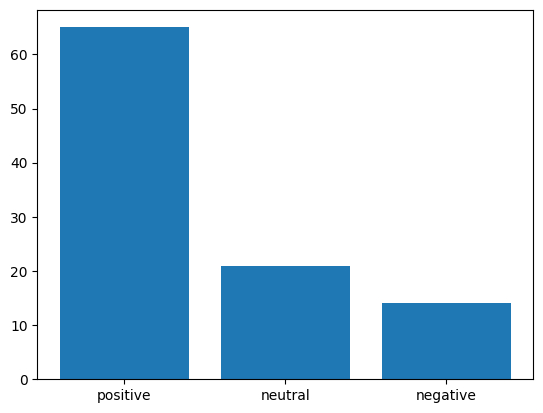

In [6]:
!pip install numpy matplotlib

import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = pd.Series(sentiments).value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.show()